### Importing Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pylab as plt

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

### Importing London Data and Data Exploration

In [11]:
xls_file = pd.ExcelFile('https://data.london.gov.uk/download/london-borough-profiles/80647ce7-14f3-4e31-b1cd-d5f7ea3553be/london-borough-profiles.xlsx')
xls_file

In [12]:
#### examining data
df = pd.read_excel(xls_file, sheet_name = 'Data')
df

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),% of resident population born abroad (2015),Largest migrant population by country of birth (2011),% of largest migrant population (2011),Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),% of population from BAME groups (2016),% people aged 3+ whose main language is not English (2011 Census),"Overseas nationals entering the UK (NINo), (2015/16)","New migrant (NINo) rates, (2015/16)",Largest migrant population arrived during 2015/16,Second largest migrant population arrived during 2015/16,Third largest migrant population arrived during 2015/16,Employment rate (%) (2015),Male employment rate (2015),Female employment rate (2015),Unemployment rate (2015),Youth Unemployment (claimant) rate 18-24 (Dec-15),Proportion of 16-18 year olds who are NEET (%) (2014),Proportion of the working-age population who claim out-of-work benefits (%) (May-2016),% working-age with a disability (2015),Proportion of working age people with no qualifications (%) 2015,Proportion of working age with degree or equivalent and above (%) 2015,"Gross Annual Pay, (2016)",Gross Annual Pay - Male (2016),Gross Annual Pay - Female (2016),Modelled Household median income estimates 2012/13,% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2014),% of employment that is in public sector (2014),"Jobs Density, 2015","Number of active businesses, 2015",Two-year business survival rates (started in 2013),Crime rates per thousand population 2014/15,Fires per thousand population (2014),Ambulance incidents per hundred population (2014),"Median House Price, 2015","Average Band D Council Tax charge (£), 2015/16",New Homes (net) 2015/16 (provisional),"Homes Owned outright, (2014) %","Being bought with mortgage or loan, (2014) %","Rented from Local Authority or Housing Association, (2014) %","Rented from Private landlord, (2014) %","% of area that is Greenspace, 2005",Total carbon emissions (2014),"Household Waste Recycling Rate, 2014/15","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2014/15","Average Public Transport Accessibility score, 2014","Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14",Rates of Children Looked After (2016),% of pupils whose first language is not English (2015),% children living in out-of-work households (2015),"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)",Teenage conception rate (2014),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,8800.0,5325.82,290.393,30.3037

### Data Cleaning

#### Renaming the columns, dropping NaN values and filtering on columns

In [13]:
df.rename(columns={'Area name': 'Borough'}, inplace=True)

In [14]:
df.dropna(subset = ["Inner/ Outer London"], inplace=True)
df.drop(['Code','New code'], axis = 1,  inplace=True) # first 2 columns are not needed, hence these are dropped

In [15]:
df.describe()

,GLA Population Estimate 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015","Overseas nationals entering the UK (NINo), (2015/16)","New migrant (NINo) rates, (2015/16)",Employment rate (%) (2015),% of employment that is in public sector (2014),"Jobs Density, 2015","Number of active businesses, 2015",Two-year business survival rates (started in 2013),"Number of cars, (2011 Census)","Number of cars per household, (2011 Census)",% children living in out-of-work households (2015),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),People aged 17+ with diabetes (%)
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,267739.393939,36.375758,19.957576,68.254545,11.781818,9616.787879,55.329404,72.715152,17.321550,3.43303,16403.333333,73.769697,80739.818182,0.808031,14.086387,7.276061,7.555152,7.203636,3.352727,5.833916
std,75383.345058,2.487849,2.756246,3.911768,3.105384,5628.954975,29.414574,4.219384,4.924379,14.53315,8838.768355,3.444514,34808.818861,0.283972,4.291332,0.186697,0.159258,0.249472,0.481153,1.347994
min,8800.000000,31.400000,11.400000,62.300000,6.000000,975.000000,14.370245,64.600000,3.424988,0.40000,6560.000000,63.800000,1692.000000,0.385861,5.653144,6.590000,7.080000,5.990000,2.600000,2.637945
25%,231200.000000,35.000000,18.600000,64.900000,9.300000,6993.000000,37.630392,69.200000,13.949105,0.56000,11055.000000,73.000000,56966.000000,0.544025,10.439538,7.180000,7.450000,7.160000,3.180000,4.993388
50%,276200.000000,36.200000,20.600000,67.700000,11.700000,9259.000000,53.543508,73.100000,17.626527,0.67000,14350.000000,74.400000,76507.000000,0.796130,13.734973,7.280000,7.570000,7.210000,3.290000,5.908371
75%,321000.000000,37.700000,21.300000,72.100000,14.000000,12157.000000,66.245595,75.400000,21.104536,1.03000,18390.000000,75.800000,106339.000000,1.064753,17.054488,7.380000,7.670000,7.310000,3.470000,6.649965
max,389600.000000,43.200000,27.200000,75.300000,18.400000,25604.000000,152.224824,79.600000,27.260638,84.29000,55385.000000,78.800000,153908.000000,1.222244,23.425716,7.610000,7.860000,7.560000,5.570000,8.457954


In [16]:
# exporting only the columns which are required for analysis from the dataset
df = df[['Borough','Gross Annual Pay, (2016)', 'Number of active businesses, 2015','Median House Price, 2015','Life satisfaction score 2011-14 (out of 10)']]

#### Convert an address into latitude and longitude values

In [17]:
boroughs = df["Borough"]

In [18]:
# The following data is missing from the original Data file, hence it needs to be populated separately 
latitude = []
longitude = []
for borough in boroughs:
    address = str(borough+', London, United Kingdom')
    geolocator = Nominatim(user_agent="london_explorer", timeout=3)
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
    location = geolocator.geocode(address)
    try: 
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        latitude.append("Not Found")
        longitude.append("Not Found")

In [19]:
# The following dataset consists of each Borough and it's location data
df_2 = pd.DataFrame(list(zip(boroughs, latitude, longitude)), columns = ['Borough','Latitude','Longitude']) 
df_2.head() 

,Borough,Latitude,Longitude
0,City of London,51.515618,-0.091998
1,Barking and Dagenham,51.554117,0.150504
2,Barnet,51.653090,-0.200226
3,Bexley,51.441679,0.150488
4,Brent,51.563826,-0.275760


#### Preparing a dataset to work with

In [20]:
merged_df = df_2

# merge Borough data with Lat&Long dataset
merged_df = merged_df.join(df.set_index('Borough'), on='Borough')

merged_df.head()

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10)
0,City of London,51.515618,-0.091998,.,26130.0,799999,6.59
1,Barking and Dagenham,51.554117,0.150504,27886,6560.0,243500,7.14
2,Barnet,51.653090,-0.200226,33443,26190.0,445000,7.48
3,Bexley,51.441679,0.150488,34350,9075.0,275000,7.38
4,Brent,51.563826,-0.275760,29812,15745.0,407250,7.25


## Foursquare Venue data

#### The cell below is a hidden cell and consists of Foursquare info (Client ID, Client Secret, Version specified)

In [21]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: ORTHAQ5JF0X3SEIDFMZYUJJREGAYXCPYTLNLIUZSIMMPFJ3Q


#### Sending request to Foursquare to find all Arts & Entertainment related venues for each London Borough

In [22]:
LIMIT = 100
radius = 1000
venues = []
for borough in boroughs:
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={}&radius={}&limit={}&categoryId={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        borough + ', London, United Kingdom', #   to add for foursquare search
        radius, 
        LIMIT,
       "4d4b7104d754a06370d81259") #   Category ID for Arts&Entertainment
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            borough,
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [23]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Borough', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(760, 5)


,Borough,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,City of London,National Gallery,51.508876,-0.128478,Art Museum
1,City of London,National Portrait Gallery,51.509438,-0.128032,Art Gallery
2,City of London,English National Opera,51.509804,-0.126945,Opera House
3,City of London,The London Coliseum,51.509846,-0.127005,Theater
4,City of London,Trafalgar Square Lions,51.507641,-0.127888,Outdoor Sculpture


In [24]:
venues_df.groupby(["Borough"]).count()
print('There are {} unique categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 36 unique categories.


## Data Analysis

#### Analyse each neighborhood

In [25]:
# one hot encoding
onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add borough column back to dataframe
onehot['Borough'] = venues_df['Borough'] 

# move borough column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

print(onehot.shape)

grouped = onehot.groupby(["Borough"]).mean().reset_index()

print(grouped.shape)
grouped.head()

(760, 37)
(33, 37)


,Borough,Art Gallery,Art Museum,Arts & Entertainment,Comedy Club,Concert Hall,Dance Studio,Drive-in Theater,Exhibit,Go Kart Track,History Museum,Indie Movie Theater,Indie Theater,Jazz Club,Laser Tag,Memorial Site,Mini Golf,Movie Theater,Multiplex,Museum,Music Venue,Opera House,Outdoor Sculpture,Performing Arts Venue,Piano Bar,Planetarium,Public Art,Racecourse,Rock Club,Roller Rink,Rugby Stadium,Salsa Club,Science Museum,Street Art,Theater,Tour Provider,Zoo Exhibit
0,Barking and Dagenham,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.166667,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0
1,Barnet,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166667,0.333333,0.000000,0.166667,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Bexley,0.000000,0.0,0.0,0.0,0.0,0.125000,0.125,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.125000,0.125000,0.250000,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.0
3,Brent,0.142857,0.0,0.0,0.0,0.0,0.142857,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.357143,0.071429,0.000000,0.142857,0.0,0.071429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.0
4,Bromley,0.000000,0.0,0.0,0.0,0.0,0.285714,0.000,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.0,0.0,0.000000,0.285714,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0


#### Find 5 most common Arts & Entertainment venues for each Borough

In [26]:
num_top_venues = 5

for hood in grouped['Borough']:
    print("----"+hood+"----")
    temp = grouped[grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
            venue  freq
0  History Museum  0.33
1   Movie Theater  0.33
2         Theater  0.17
3   Go Kart Track  0.17
4       Rock Club  0.00


----Barnet----
                   venue  freq
0          Movie Theater  0.33
1  Performing Arts Venue  0.33
2                 Museum  0.17
3              Mini Golf  0.17
4             Racecourse  0.00


----Bexley----
                   venue  freq
0                 Museum  0.25
1  Performing Arts Venue  0.12
2                Theater  0.12
3              Multiplex  0.12
4           Dance Studio  0.12


----Brent----
           venue  freq
0  Movie Theater  0.36
1    Art Gallery  0.14
2   Dance Studio  0.14
3    Music Venue  0.14
4        Theater  0.07


----Bromley----
                 venue  freq
0         Dance Studio  0.29
1        Movie Theater  0.29
2  Indie Movie Theater  0.14
3          Music Venue  0.14
4              Theater  0.14


----Camden----
         venue  freq
0  Zoo Exhibit  0.48
1  Music Venue  

#### Create a dataframe of the venues

In [27]:
# Function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = grouped['Borough']

for ind in np.arange(grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,History Museum,Movie Theater,Go Kart Track,Theater,Zoo Exhibit
1,Barnet,Performing Arts Venue,Movie Theater,Mini Golf,Museum,History Museum
2,Bexley,Museum,Multiplex,Dance Studio,Performing Arts Venue,Drive-in Theater
3,Brent,Movie Theater,Art Gallery,Dance Studio,Music Venue,Outdoor Sculpture
4,Bromley,Dance Studio,Movie Theater,Theater,Music Venue,Indie Movie Theater


## Machine Learning

#### Clustering similar boroughs together using k - means clustering

In [29]:
# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 1, 1, 4, 3, 0, 3, 1], dtype=int32)

In [30]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge dataframes
merged = merged_df.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

merged.head() # last columns are added to the Merged dataframe

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,City of London,51.515618,-0.091998,.,26130.0,799999,6.59,3,Theater,Art Gallery,Outdoor Sculpture,Movie Theater,Art Museum
1,Barking and Dagenham,51.554117,0.150504,27886,6560.0,243500,7.14,0,History Museum,Movie Theater,Go Kart Track,Theater,Zoo Exhibit
2,Barnet,51.653090,-0.200226,33443,26190.0,445000,7.48,0,Performing Arts Venue,Movie Theater,Mini Golf,Museum,History Museum
3,Bexley,51.441679,0.150488,34350,9075.0,275000,7.38,1,Museum,Multiplex,Dance Studio,Performing Arts Venue,Drive-in Theater
4,Brent,51.563826,-0.275760,29812,15745.0,407250,7.25,1,Movie Theater,Art Gallery,Dance Studio,Music Venue,Outdoor Sculpture


In [31]:
merged['Cluster Labels'] = merged['Cluster Labels'].astype(int)

## Data Visualisation

#### Map 

In [32]:
# create map of London using latitude and longitude values

map_clusters = folium.Map(location=[latitude[0], longitude[0]], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(merged['Latitude'], merged['Longitude'], merged['Borough'], merged['Cluster Labels'], merged['Median House Price, 2015']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' with the median house price ' + '£{:,.2f}'.format(int(price)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
    
map_clusters

##### Each cluster is color coded for the ease of presentation, we can see there is a high variety of boroughs which fall in different clusters. The majority of the boroughs falls in the blue cluster which is the second cluster. We can also prove it with the bar chart below. Furthermore, the Median House Price is visible when hovering the mouse over the circle for each Borough.

#### Bar Charts

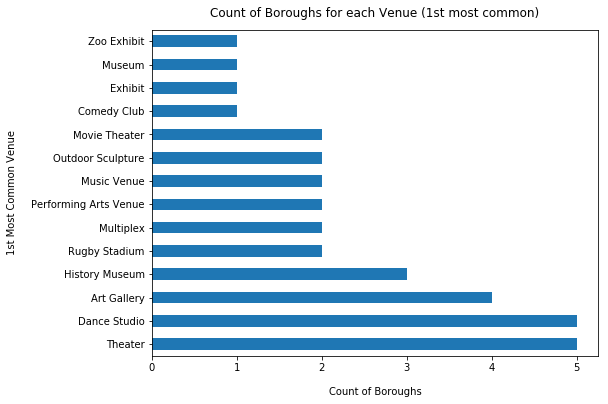

In [33]:
# Bar Chart representing the counts for each venue (1st most common)

merged['1st Most Common Venue'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of Boroughs", labelpad=14)
plt.ylabel("1st Most Common Venue", labelpad=14)
plt.title("Count of Boroughs for each Venue (1st most common)", y=1.02);

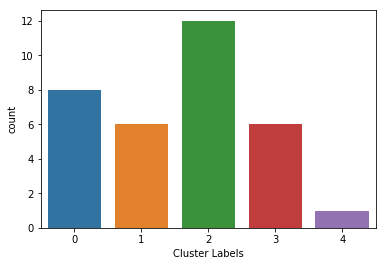

In [34]:
# Bar Chart representing the counts for each cluster

p = sns.countplot(data=merged, x = 'Cluster Labels')

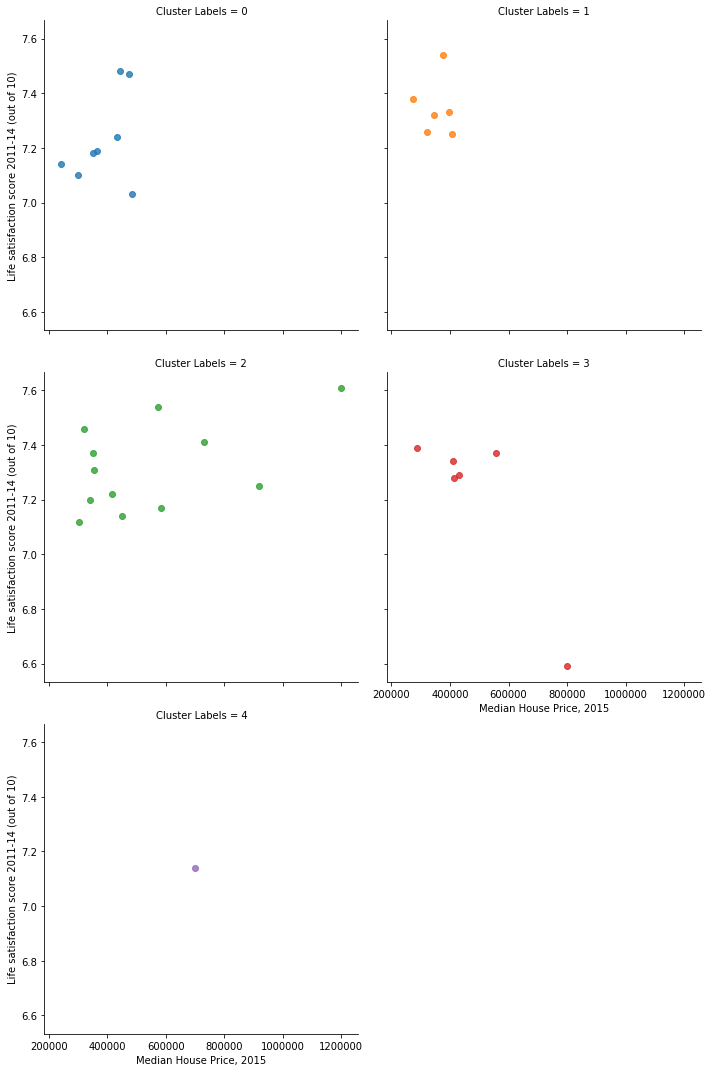

In [35]:
# In the following plotted charts you can see an indepth analysis on boroughs: the correlation between Life Satisfaction data and Median House Price by Clusters.

filtered = merged[["Borough", "Median House Price, 2015", "Cluster Labels","Life satisfaction score 2011-14 (out of 10)"]]

sns.lmplot("Median House Price, 2015", "Life satisfaction score 2011-14 (out of 10)", data=filtered, hue="Cluster Labels", fit_reg=False, col='Cluster Labels', col_wrap=2)

##### The above charts give a few valuable insights: The most common venues are Theatres and Dance Studio accross all Boroughs. The most dense cluster is number 2, the leasdt dense is number 4 with only 1 Borough. Cosnidering the Median House Price, Cluster 0 and 1 have the price in a similar range. Cluster 3 has 1 outlier, but 

# Details

#### Tables of each of the clusters to identify the characteristics of each cluster and the boroughs in them are available below

In [178]:
merged[merged['Cluster Labels'] == 0]

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,City of London,51.515618,-0.091998,.,26130.0,799999,6.59,0,Theater,Art Gallery,Outdoor Sculpture,Movie Theater,Art Museum
23,Merton,51.410803,-0.188099,33989,12070.0,415000,7.28,0,Theater,Music Venue,Dance Studio,Zoo Exhibit,Go Kart Track


In [179]:
merged[merged['Cluster Labels'] == 1]

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Ealing,51.512655,-0.305195,31331,18700.0,430000,7.29,1,Theater,Multiplex,Performing Arts Venue,Dance Studio,Art Gallery
15,Havering,51.544369,-0.144303,33398,10115.0,287500,7.39,1,Multiplex,Theater,History Museum,Music Venue,Dance Studio
31,Wandsworth,51.457027,-0.193261,41064,18695.0,557000,7.37,1,Dance Studio,Multiplex,History Museum,Theater,Music Venue


In [180]:
merged[merged['Cluster Labels'] == 2]

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Bexley,51.441679,0.150488,34350,9075.0,275000,7.38,2,Museum,Multiplex,Theater,Dance Studio,Drive-in Theater
4,Brent,51.563826,-0.275760,29812,15745.0,407250,7.25,2,Movie Theater,Dance Studio,Multiplex,Outdoor Sculpture,Music Venue
5,Bromley,51.402805,0.014814,37682,15695.0,374975,7.54,2,Movie Theater,Dance Studio,Theater,Music Venue,Indie Movie Theater
9,Enfield,51.652085,-0.081018,31603,13925.0,320000,7.26,2,History Museum,Theater,Dance Studio,Movie Theater,Museum
10,Greenwich,51.482084,-0.004542,32415,10060.0,340000,7.20,2,Outdoor Sculpture,Art Gallery,Dance Studio,Indie Movie Theater,Museum
12,Hammersmith and Fulham,51.492038,-0.223640,38041,14095.0,730000,7.41,2,Comedy Club,Dance Studio,Theater,Outdoor Sculpture,Go Kart Track
14,Harrow,51.596769,-0.337275,33202,15155.0,396150,7.33,2,Dance Studio,Multiplex,Public Art,Indie Movie Theater,Movie Theater
16,Hillingdon,51.542519,-0.448335,33508,13505.0,350000,7.37,2,Art Gallery,Music Venue,Dance Studio,Indie Theater,Memorial Site
17,Hounslow,51.468613,-0.361347,31001,13910.0,355000,7.31,2,Rugby Stadium,Memorial Site,Theater,Museum,Comedy Club
18,Islington,51.538429,-0.099905,36592,22110.0,583000,7.17,2,Music Venue,Theater,Dance Studio,Art Gallery,Outdoor Sculpture


In [181]:
merged[merged['Cluster Labels'] == 3]

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Barking and Dagenham,51.554117,0.150504,27886,6560.0,243500,7.14,3,History Museum,Movie Theater,Go Kart Track,Theater,Zoo Exhibit
2,Barnet,51.653090,-0.200226,33443,26190.0,445000,7.48,3,Movie Theater,Performing Arts Venue,Museum,Mini Golf,History Museum
6,Camden,51.542305,-0.139560,39796,31385.0,700000,7.14,3,Zoo Exhibit,Music Venue,Art Gallery,Rock Club,Museum
7,Croydon,51.371305,-0.101957,32696,15540.0,300000,7.10,3,Music Venue,Art Gallery,Performing Arts Venue,Theater,Movie Theater
11,Hackney,51.543240,-0.049362,32056,18510.0,485000,7.03,3,Art Gallery,Performing Arts Venue,History Museum,Museum,Indie Movie Theater
13,Haringey,51.587930,-0.105410,31063,12675.0,432500,7.24,3,Performing Arts Venue,Museum,Multiplex,Concert Hall,Dance Studio
19,Kensington and Chelsea,51.498995,-0.199123,.,14350.0,1200000,7.61,3,Exhibit,Science Museum,Art Gallery,Outdoor Sculpture,Theater
26,Richmond upon Thames,51.440461,-0.305519,42076,14185.0,575000,7.54,3,Art Gallery,Theater,Movie Theater,Museum,History Museum
27,Southwark,51.502922,-0.103458,33864,17120.0,475000,7.47,3,History Museum,Art Gallery,Performing Arts Venue,Theater,Music Venue
30,Waltham Forest,51.598169,-0.017837,30859,11020.0,366569,7.19,3,Art Gallery,Performing Arts Venue,Theater,Museum,Music Venue


In [182]:
merged[merged['Cluster Labels'] == 4]

,Borough,Latitude,Longitude,"Gross Annual Pay, (2016)","Number of active businesses, 2015","Median House Price, 2015",Life satisfaction score 2011-14 (out of 10),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
20,Kingston upon Thames,51.409627,-0.306262,37979,8970.0,410000,7.34,4,Art Gallery,Rock Club,Dance Studio,Public Art,Multiplex
22,Lewisham,51.462432,-0.010133,33157,10405.0,352000,7.18,4,Art Gallery,Music Venue,Indie Movie Theater,Dance Studio,Museum
28,Sutton,51.357511,-0.173640,32697,8710.0,320000,7.46,4,Art Gallery,Dance Studio,Multiplex,Street Art,Science Museum


In [147]:
#The cluster one is the biggest cluster with 9 of the 15 neighborhoods in the borough Kingston upon Thames. Upon closely examining these neighborhoods we can see that the most common venues in these neighborhoods are Restaurants, Pubs, Cafe, Supermarkets, and stores.

In [148]:
#Results and Discussion
#The aim of this project is to help people who want to relocate to the safest borough in London, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Clusters 3 and 4 have Train stations and Bus stops as the most common venues. If a person is looking for a neighborhood with stores and restaurants in a close proximity then the neighborhoods in the first cluster is suitable. For a family I feel that the neighborhoods in Cluster 4 are more suitable dues to the common venues in that cluster, these neighborhoods have common venues such as Parks, Gym/Fitness centers, Bus Stops, Restaurants, Electronics Stores and Soccer fields which is ideal for a family.

#Conclusion
#This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the borough of London. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.